## 왜 머신러닝이 필요할까요?

  - **문제 상황**: 스팸 메일 필터와 같이 **끊임없이 변화하는 패턴**을 개발자가 매번 직접 규칙으로 코딩하는 것은 사실상 불가능
  - **해결책**: 머신러닝(Machine Learning)은 기계가 대량의 데이터(경험)를 통해 스스로 **학습**하여 특정 **임무**의 수행 능력을 향상시키는 기술
  - **핵심 원리**: 명시적인 규칙을 프로그래밍하는 대신, **데이터 속 패턴을 학습**하여 예측이나 분류 같은 문제를 해결

## 2\. 핵심 원리 파헤치기 (Deep Dive)

### 머신러닝의 세 가지 핵심 요소

  - 컴퓨터 과학자 Tom Mitchell은 머신러닝을 '경험(E)을 통해 **임무(T)** 수행 성능(P)을 향상시키는 것'으로 정의함.
  
    데이터 분석 전 이 세 가지 요소를 먼저 정의해야 함.
  - **경험 (Experience, E)**: 분석의 재료가 되는 **데이터**. (예: 1년간의 고객 구매 기록)
  - **임무 (Task, T)**: 데이터로 해결하고자 하는 **문제**. (예: 고객의 내일 구매 여부 예측)
  - **성능 (Performance, P)**: 모델이 임무를 얼마나 잘 수행했는지 나타내는 **척도**. (예: 예측의 정확도 95%)

### 지도학습 vs. 비지도학습: 정답지의 유무

  - 머신러닝은 학습 데이터에 '**정답지(Label)**'의 유무에 따라 크게 두 가지로 나뉨.
  - **지도학습(Supervised Learning)**: **문제(데이터)와 정답(레이블)이 함께** 주어진 상태에서 학습함.
      - **분류(Classification)**: 결과가 'A', 'B'와 같이 **이산적인 값**일 때 사용함. (예: 스팸 메일 여부 판별)
      - **회귀(Regression)**: 결과가 **연속적인 숫자**일 때 사용함. (예: 내일의 주가 예측)
  - **비지도학습(Unsupervised Learning)**: **정답 없이 데이터만** 주어진 상태에서 데이터 내의 숨겨진 구조나 패턴을 찾아냄.
      - **군집(Clustering)**: 비슷한 특성을 가진 데이터끼리 **그룹으로 묶음**. (예: 고객을 구매 패턴에 따라 그룹핑)
      - **연관(Association)**: 데이터 항목 간의 **관계를 찾음**. (예: 맥주와 기저귀의 동시 구매 관계)

### 데이터 분석 단계에서 머신러닝의 위치

  - 머신러닝 모델링은 전체 데이터 분석 과정의 일부이며, 일반적인 과정은 다음과 같음.

1.  **데이터 준비 및 탐색 (EDA)**: 데이터의 통계적 특성을 파악하고 전처리를 수행함. (가장 중요하고 시간이 많이 소요되는 단계)
2.  **모델링 (Modeling)**: 분석 목적에 맞는 머신러닝 알고리즘을 적용하여 모델을 생성함.
3.  **모델 평가 및 배포 (Assess & Deployment)**: 생성된 모델의 성능을 평가하고, 실제 문제 해결에 적용함.

## 3. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### Scikit-learn: Python의 대표적인 머신러닝 라이브러리

  - `사이킷런(Scikit-learn)`은 Python의 대표적인 머신러닝 라이브러리임.
  - **분류, 회귀, 군집** 등 다양한 알고리즘과 데이터 전처리, 모델 평가 기능을 제공하여 머신러닝의 필수 패키지로 사용됨.

In [ ]:
# 사이킷런 패키지 설치 명령어
!pip install scikit-learn -q

### 데이터 탐색(EDA)을 위한 기초 통계량 계산

  - 모델링에 앞서, 데이터의 분포와 특성을 파악하는 과정이 매우 중요함.

#### 왜도(Skewness)와 첨도(Kurtosis)

  - **왜도(Skewness)**: 데이터 분포의 **비대칭성**을 나타내는 지표임.
      - `0`: 좌우 대칭 (정규분포)
      - `양수`: 오른쪽 꼬리가 김
      - `음수`: 왼쪽 꼬리가 김
  - **첨도(Kurtosis)**: 데이터 분포의 **뾰족한 정도**를 나타내는 지표임.
      - `0`: 정규분포와 유사한 높이
      - `양수`: 더 뾰족함
      - `음수`: 더 완만함

<!-- end list -->

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis # scipy.stats : 통계 관련 라이브러리에서 첨도랑 왜도 함수 불러와서 이용
import matplotlib.pyplot as plt

# 평균이 0, 표준편차가 1인 정규분포에서 10,000,000개 샘플 생성
data = np.random.normal(0,1,10000000)

# 재현성을 위해 시드 설정 (=항상 같은 난수를 생성한다)
np.random.seed(42)

print("평균값" , np.mean(data))
print("중앙값" , np.median(data))
print("표준편차" , np.std(data))
print("분산", np.var(data))
print("왜도" , skew(data))
print("첨도" , kurtosis(data))



평균값 -6.395751574849544e-05
중앙값 2.312484581959003e-05
표준편차 1.0000135814684643
분산 1.0000271631213848
왜도 3.404184066057315e-05
첨도 -0.001402056394951945


##### 코드 해설

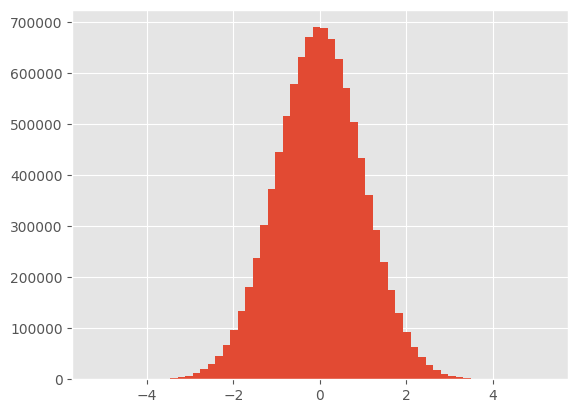

In [ ]:
# 시각화 스타일
plt.style.use('ggplot')

# 히스토그램 그리기 (bins는 막대의 개수)
plt.hist(data, bins=60)
plt.show()

##### 코드해설

#### 공분산과 상관계수

  - **공분산(Covariance)**: 두 변수가 **같은 방향**으로 움직이는지를 나타냄. 값의 크기가 관계의 강도를 직접 의미하지는 않음.
  - **상관계수(Correlation Coefficient)**: 공분산을 표준화하여 **-1에서 1 사이**의 값으로 표현함. 두 변수 간 **선형 관계의 강도와 방향**을 모두 나타냄.
      - `1`: 강한 양의 상관관계
      - `-1`: 강한 음의 상관관계
      - `0`: 선형 관계 없음

<!-- end list -->

In [3]:
import seaborn as sns
import numpy as np


iris = sns.load_dataset("iris")

print(iris.select_dtypes(include=np.number).corr())

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


##### 코드 해설

<function matplotlib.pyplot.show(close=None, block=None)>

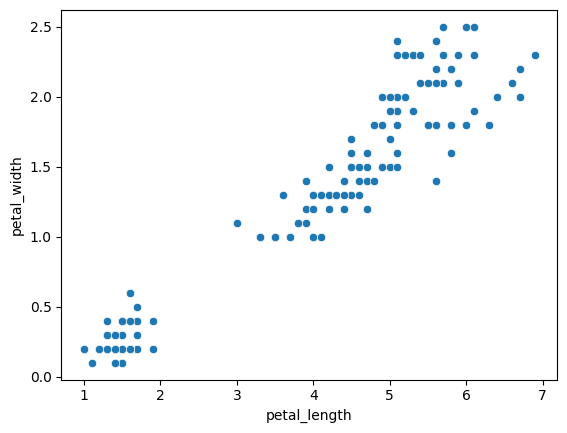

In [5]:
import matplotlib.pyplot as plt

sns.scatterplot(x="petal_length", y="petal_width", data = iris)
plt.show

##### 코드 해설

In [6]:
# iris 데이터의 모든 변수에 대한 기초 통계량 요약
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


##### 코드 해설

## 4\. 핵심 요약 (Key Takeaways)

- **머신러닝의 본질**: 기계가 데이터(경험)를 통해 특정 **문제(임무)** 해결 **성능**을 스스로 향상시키는 기술임.
- **지도학습 vs. 비지도학습**: 분석의 첫 단계는 '**정답(레이블)**' 데이터의 유무를 파악하는 것임. 예측 대상이 명확하면 **지도학습**, 데이터 내 구조 파악이 목적이면 **비지도학습**을 선택함.
- **데이터 탐색의 중요성**: 성공적인 머신러닝 모델은 **데이터에 대한 깊은 이해**에서 출발함. 모델링 전 상관계수, 평균, 분포 등 기초 통계량을 확인하는 것은 필수 과정임.